## IoT Traffic Classification Using XGBoost
### Overview
This project focuses on building a machine learning model using XGBoost to classify IoT network traffic into benign and attack categories. The dataset includes packet captures (PCAP) of IoT traffic, labeled either as benign (normal traffic) or attack (malicious traffic). The goal is to build a model capable of distinguishing between benign and attack traffic with high accuracy and reliability.

The dataset contains a significant class imbalance, with attack traffic being much more prevalent than benign traffic, which posed challenges in model development and evaluation.

### Model
The core model used in this project is XGBoost (eXtreme Gradient Boosting), a powerful ensemble learning algorithm that is well-suited for tabular data. Given the size of the dataset and the complexity of the task, the model was trained using GPU acceleration to improve training speed.

#### Key Model Features:
- **Algorithm**: XGBoost Classifier
- **GPU Acceleration**: Enabled for faster model training
- **Handling Class Imbalance:** The scale_pos_weight parameter was used to handle the imbalance between benign and attack traffic
- **Hyperparameters**:
  - *n_estimators:* 100 (number of boosting rounds)
  - *max_depth*: 5 (to prevent overfitting)
  - *learning_rate*: 0.1 (controls the step size during model training)
  - *tree_method*: "hist"
  - *device*: "cuda" for GPU support

#### Model Training Logs:
The model was successfully trained using GPU acceleration, with the following peak metrics:
- **Peak memory usage**: 975MiB
- **Training time**: ~4 seconds for 100 boosting rounds

#### Model Evaluation Metrics:
The model achieved the following performance metrics:

- **Confusion Matrix**:
  
|                | Predicted Benign	| Predicted Attack |  
|----------------|------------------|------------------|  
| Actual Benign  |	55,218          |	164,467          |  
| Actual Attack	 |  4,151	          | 2,016,337        |

- **Classification Report**:  
  
| Class	     | Precision	| Recall | F1-Score |	Support  |
|------------|------------|--------|----------|----------|
| Benign (0) | 0.93	      | 0.25	 | 0.40     | 219,685  |
| Attack (1) | 0.92	      | 1.00	 | 0.96	    | 2,020,488| 
|  **Mean**  | **92.5%** | **75%** | **68%** | **2,240,173**|

  - **Accuracy:** 92%  

  - **Macro Average Precision:** 0.93  

  - **Macro Average Recall:** 0.62  

  - **Macro Average F1-Score:** 0.68  
  
  - *The model performs well on attack traffic but has lower recall on benign traffic, misclassifying many benign records as attacks.*

- **ROC-AUC Score**:
  - **ROC-AUC: 0.9936**
  - *The high ROC-AUC score indicates that the model is very capable of distinguishing between benign and attack traffic, though improvements are needed for handling the minority benign class.*
  - 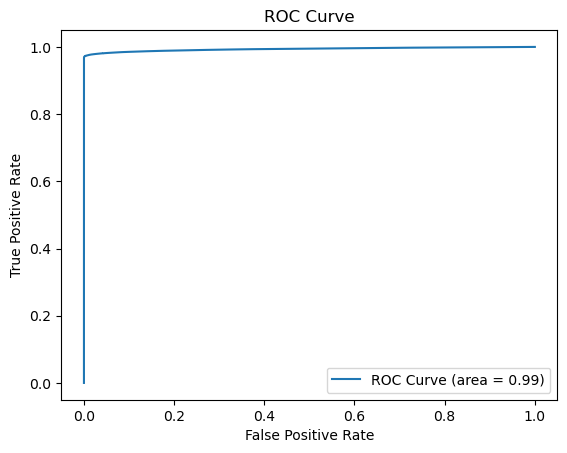

### Dataset
The dataset used for training and evaluation includes packet capture (PCAP) data labeled with 0 for benign traffic and 1 for attack traffic. The dataset contains a significant imbalance, with attack traffic making up the majority of the records. The dataset was sourced from the Canadian Institute for Cybersecurity and is available for download here: https://www.unb.ca/cic/datasets/iotdataset-2023.html

- **Total Records:** 2,240,173
- **Benign Records:** 219,685
- **Attack Records:** 2,020,488

#### Preprocessing:
- Infinite values in the "Rate" feature were replaced with large constants to preserve their importance while maintaining model compatibility.
- Missing values were handled through imputation, where necessary.
- Features were standardized to improve model performance.

### Challenges and Future Work
- **Class Imbalance**:
The class imbalance (approximately 1 benign record for every 9 attack records) presents a challenge in model performance, particularly for the minority class (benign). This was partially mitigated using the scale_pos_weight parameter, but additional techniques like oversampling/undersampling or Synthetic Minority Over-sampling Technique (SMOTE) could be explored to further improve benign traffic classification.

#### Future Enhancements:
- Implement SMOTE or other resampling techniques to improve benign classification recall.
- Fine-tune hyperparameters using Grid Search or Random Search to further optimize model performance.
- Explore other models or ensemble techniques to reduce false positives and improve overall classification accuracy.